<div style="text-align: center; color: #345; padding-top: 10px;">
<h1 style="background-color: skyblue; font-family: newtimeroman; font-size: 220%; text-align: center;"><span style="color: #000000;">Deep Learning - Predicting loan defaults </span><span style="color: #000000;"><br></br>
    <img src="https://mma.prnewswire.com/media/76307/lending_club_logo.jpg?w=200"/><span style="color: #0000ff;"></h1>
</div>

## Data
Data contains 2 sets for data for rejected and accepted loans, from the Lending club, between 2007 to 2018 Quarter 4. \
We will look at the accepted loans and only a subset of the columns (see list below)


## Business summary
Can we predict if a given borrower will default on their loan payments using the historical data provided. i.e. will the loan be ***Charged-off*** or set to ***Default*** status

## Goal
To develop a classification model that predicts the **"loan status"** of a loan 

Description of the columns used in prediction: \
**Note** with over 150 columns in this dataset, only the below will be used

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>16</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>17</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>18</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>19</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>20</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>22</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>23</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>24</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>25</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>26</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

# Libraries

In [4]:
import numpy as np 
import pandas as pd 

#EDA 
import seaborn as sns 
import matplotlib.pyplot as plt

#Imputation 
from sklearn.impute import SimpleImputer

#split

from sklearn.model_selection import train_test_split

# Deep Learning 
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Evaluation
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve

In [ ]:
#Define theme for matplotlib and seaborn to ensure consistency
sns.set_theme()

# Read Data and review

In [5]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv',
                 usecols=['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                          'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
                          'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',"addr_state",
                          'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
                          'revol_util', 'total_acc', 'initial_list_status', 'application_type',
                          'mort_acc', 'pub_rec_bankruptcies'])

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [6]:
#target analysis
df["loan_status"].value_counts(dropna = False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

note the null values in target 

# Target Preprocessing
Looking at the target there are multiple categories. \
For our analysis we want to define a Binary classification of ***Default vs Paid***

In [7]:
replace_status = {"Fully Paid":"Paid",
             "Current": "Paid",
             "Charged Off": "Default",
              "Does not meet the credit policy. Status:Charged Off":"Default",
              "Does not meet the credit policy. Status:Charged Off":"Default",
              "Does not meet the credit policy. Status:Fully Paid":"Paid",
              "Late (31-120 days)":"Late",
              "Late (16-30 days)":"Late",
              "In Grace Period":"Late",
              "Default":"Default"
             }

In [8]:
df["loan_status"] = df["loan_status"].replace(replace_status)

We will drop everything NOT ***Default or Paid*** i.e. null and Late \
In another notebook we can investigate how ***Late*** payments affect ***Default*** and look at imputing the null values

In [9]:
# Keep Default or Paid loans only
df = df[ (df["loan_status"]== "Paid") | (df["loan_status"]== "Default")]

In [10]:
df["loan_status"].value_counts(dropna= False)

Paid       1957056
Default     269360
Name: loan_status, dtype: int64

# Exploratory Data Analysis
1. individual column and data type investigation 
1. correlation analysis

In [ ]:
df.describe().transpose()

In [ ]:
df.shape

In [ ]:
#Target analysis
df["loan_status"].value_counts(dropna = False).plot(kind = "bar",figsize = (10,5))

***Note*** Very imbalanced data set \
***NB*** for determining the type of metric used in prediction i.e. accuracy will not work 

### Non-numeric analysis

In [8]:
# all object type features
df.describe( include= ["object"]).transpose()

count  unique                 top     freq
term                 2226416       2           36 months  1589901
grade                2226416       7                   B   656005
sub_grade            2226416      35                  C1   143681
emp_title            2062642  507786             Teacher    38293
emp_length           2082396      11           10+ years   737403
home_ownership       2226416       6            MORTGAGE  1096160
verification_status  2226416       3     Source Verified   871779
issue_d              2226416     139            Mar-2016    61109
loan_status          2226416       2                Paid  1957056
purpose              2226416      14  debt_consolidation  1257882
title                2203544   63153  Debt consolidation  1133602
addr_state           2226416      51                  CA   309861
earliest_cr_line     2226387     754            Sep-2004    15155
initial_list_status  2226416       2                   w  1508623
application_type     2226416       2          Individual  2109484

In [9]:
def create_countplot(axes, x_val,order_val, title, rotation="n"):
    sns.countplot(ax= axes, data=df, x=x_val, order = order_val.value_counts(dropna= False).index,hue = "loan_status")
    axes.set_title(title)
    if rotation =="y":
        axes.set_xticklabels(list(order_val.unique()), rotation=90)

In [15]:
import matplotlib.pyplot as plt

In [19]:
with plt.style.context(['science','ieee','no-latex']):
    fig, ax = plt.subplots(2,3, figsize= (20,10))

    create_countplot(ax[0,0],'term', df["term"],"The number of payments on the loan (months)" )

    create_countplot(ax[0,1],'grade', df["grade"],"Loan grade")

    create_countplot(ax[0,2],'sub_grade', df["sub_grade"],"Loan sub_grade","y")

    create_countplot(ax[1,0],'emp_length', df["emp_length"],"Borrower length of employment (years)", "y" )

    create_countplot(ax[1,1],'home_ownership', df["home_ownership"],"Borrower home ownership status" )

    create_countplot(ax[1,2],'verification_status', df["verification_status"],"verification_status" )


    plt.tight_layout()
    plt.show()

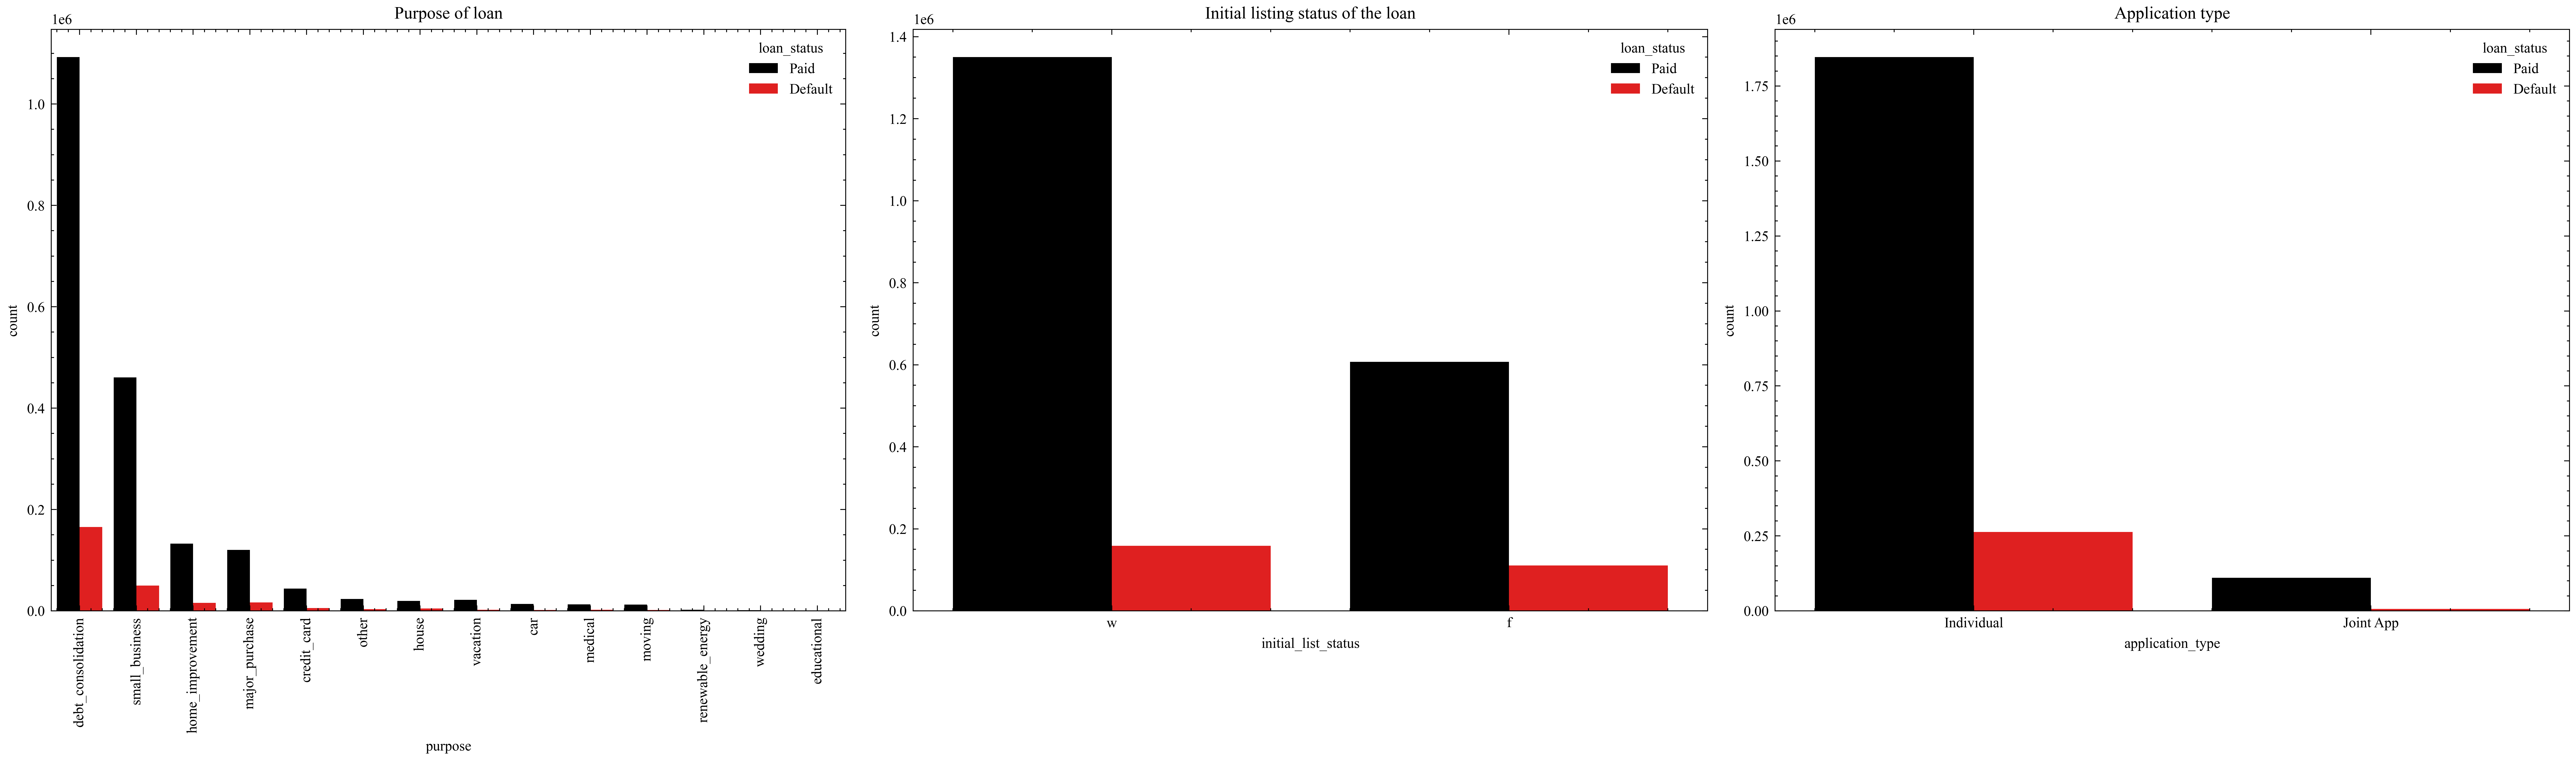

In [20]:
with plt.style.context(['science','ieee','no-latex']):
    fig, ax = plt.subplots(1,3, figsize= (20,6))

    create_countplot(ax[0],'purpose', df["purpose"],"Purpose of loan" ,"y")
    create_countplot(ax[1],'initial_list_status', df["initial_list_status"],"Initial listing status of the loan" )
    create_countplot(ax[2],'application_type', df["application_type"],"Application type" )



    plt.tight_layout()
    plt.show()

In [ ]:
## too many unique titles to plot 
df["emp_title"].value_counts(dropna= False)

In [ ]:
df[["title","purpose"]]

Puropose and Title are essentially duplicates with Purpose being more descriptive \
As such we can drop Title 

### Date Analysis

In [21]:
#convert to date 
df["issue_d"] = pd.to_datetime(df["issue_d"])
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"])

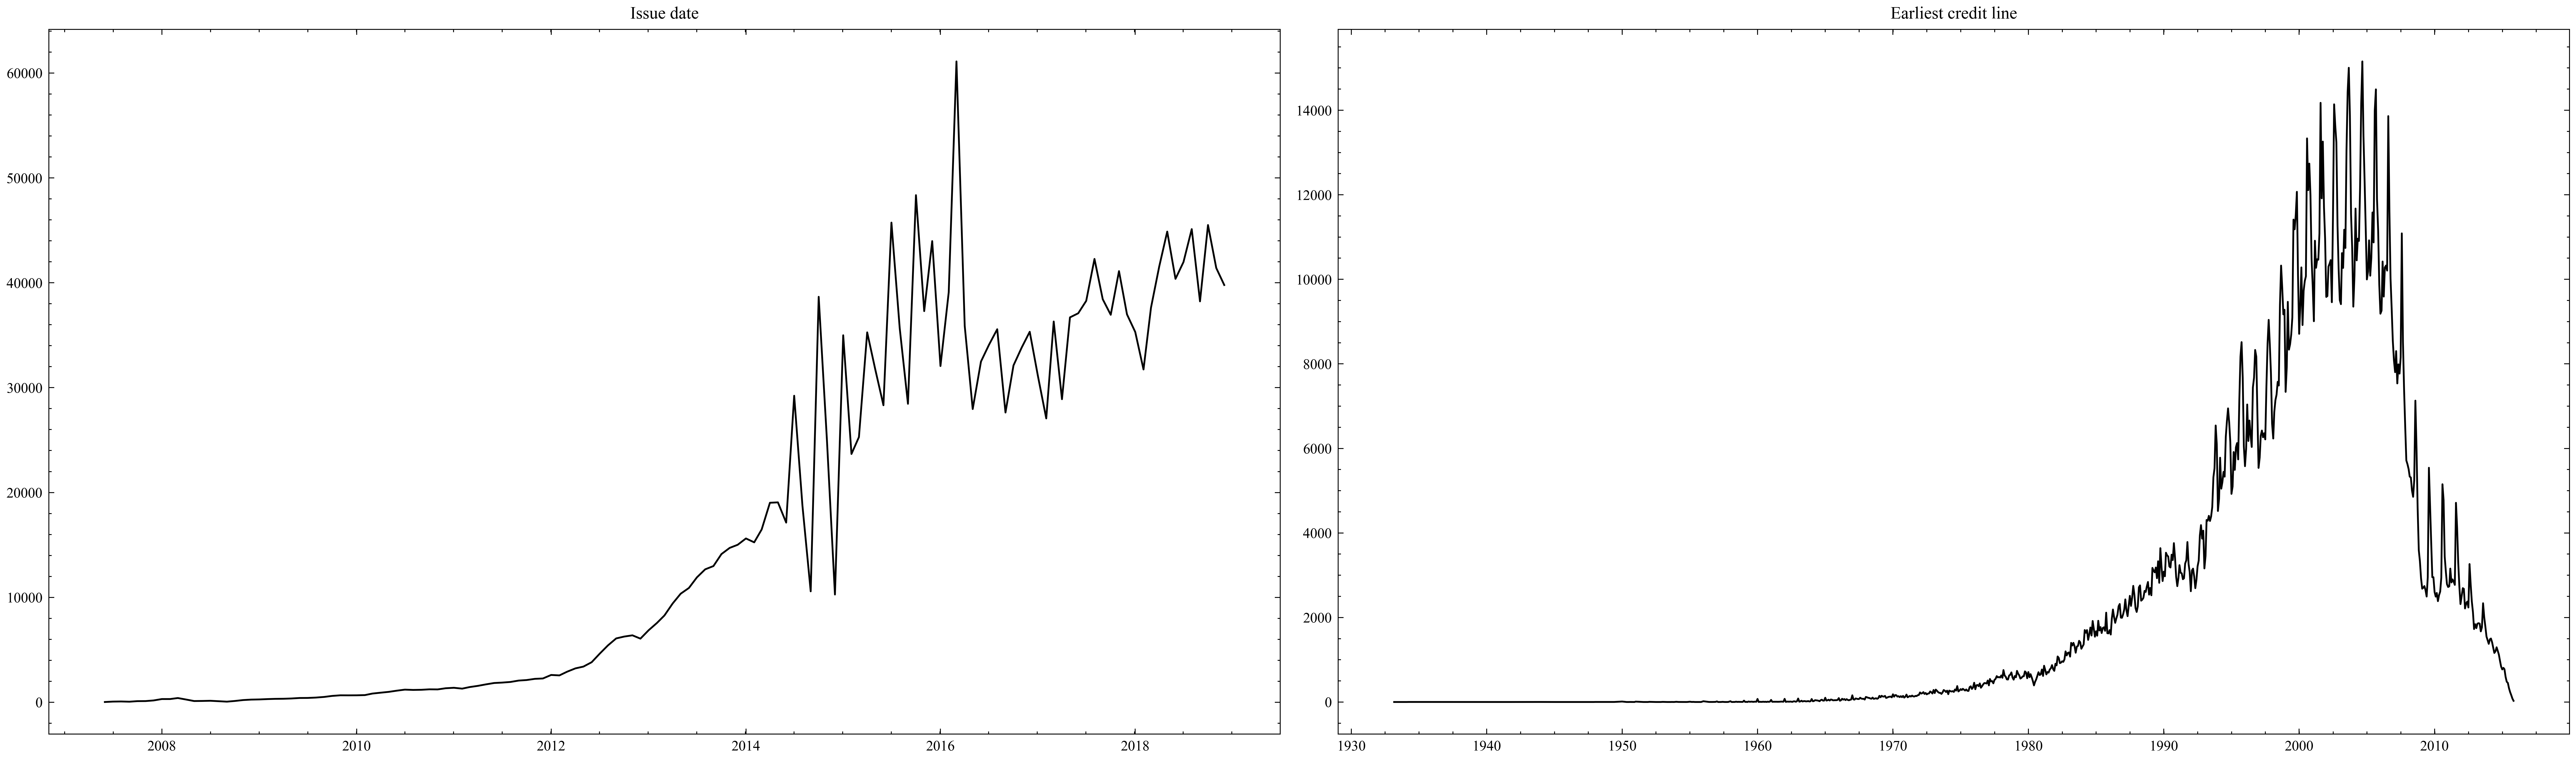

In [23]:
with plt.style.context(['science','ieee','no-latex']):    
    fig, ax = plt.subplots(1,2, figsize= (20,6))

    ax[0].plot(df['issue_d'].value_counts().sort_index())
    ax[1].plot(df['earliest_cr_line'].value_counts().sort_index())
    ax[0].set_title("Issue date")
    ax[1].set_title("Earliest credit line")

    plt.tight_layout()
    plt.show()

##### Feature Engineering notes
From the above the categorical values need to be processed

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">Change</th>
    <th class="tg-fymr">Column</th>
    <th class="tg-fymr">Comment</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky" rowspan="7">Dummies<br><br></td>
    <td class="tg-0pky">home_ownership</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">verification_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">purpose</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">initial_list_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">application_type</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">sub grade</td>
    <td class="tg-0pky">Potentially ordinal but too many values</td>
  </tr>
  <tr>
    <td class="tg-0lax">addr_state</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Numerical conversion </td>
    <td class="tg-0pky">emp_length</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">term</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Drop</td>
    <td class="tg-0pky">emp title</td>
    <td class="tg-0pky">Due to the number of unique values</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">title</td>
    <td class="tg-0pky">Duplicate of Purpose</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">grade</td>
    <td class="tg-0pky">Duplicate information as in subgrade</td>
  </tr>
  <tr>
    <td class="tg-0pky">Date</td>
    <td class="tg-0pky">issue_d</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">earliest_cr_line</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
</tbody>
</table>

### 2. Correlation Analysis

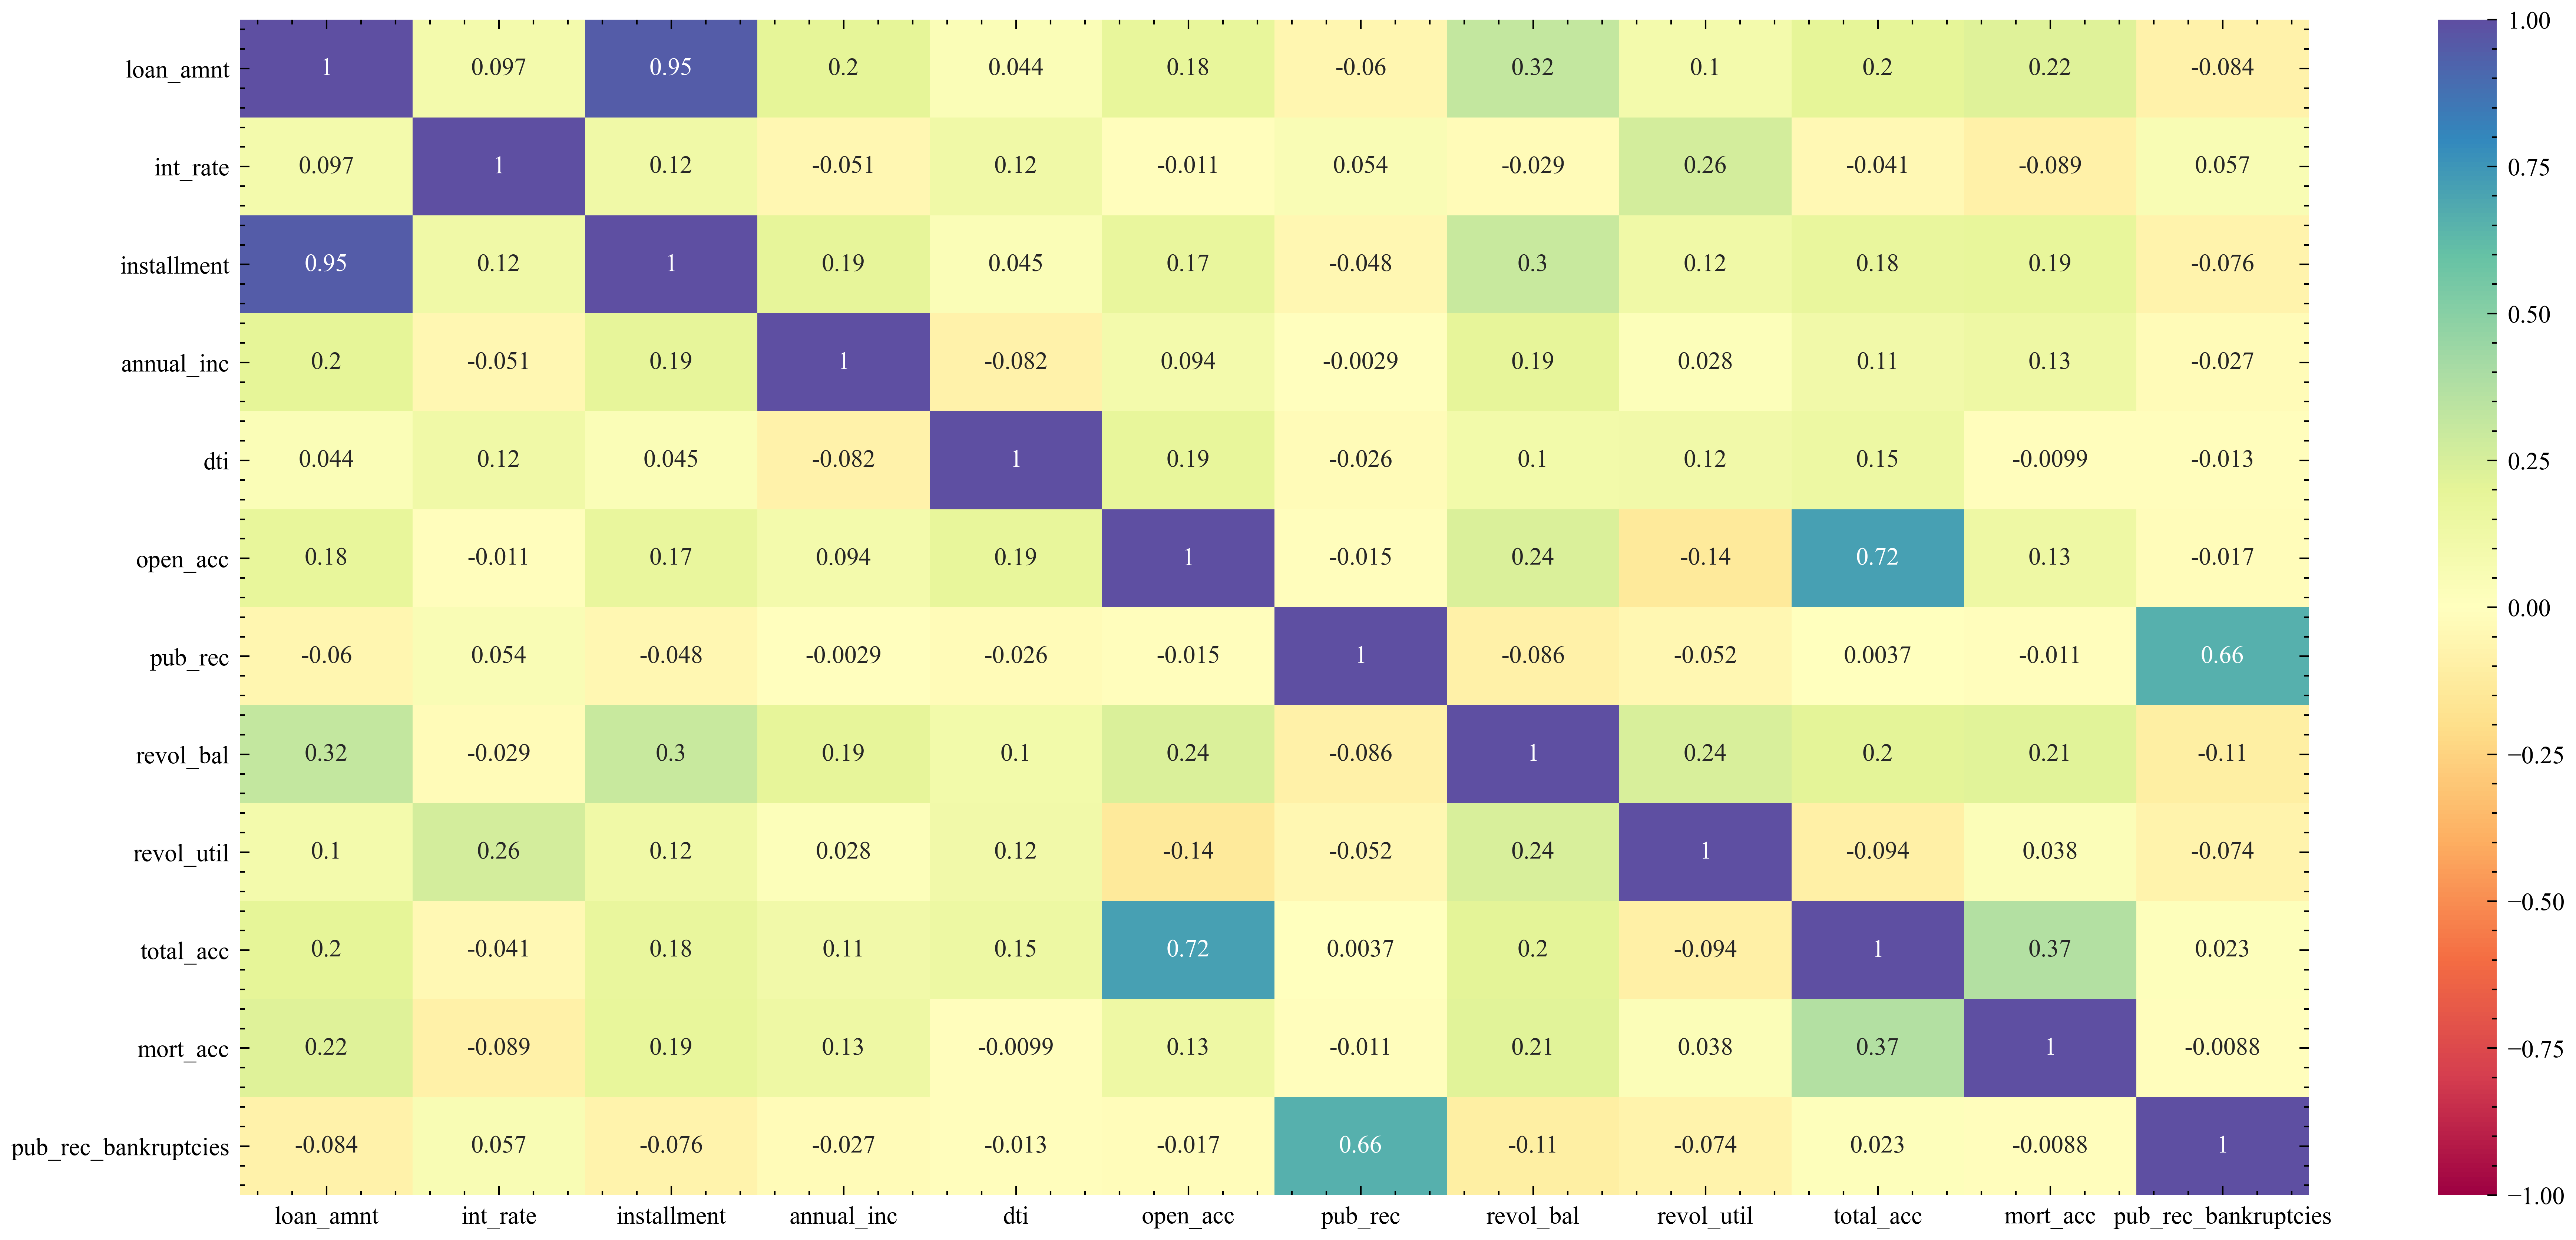

In [25]:
with plt.style.context(['science','ieee','no-latex']):
    plt.figure(figsize= (15,7))
    sns.heatmap(df.corr(), vmin=1, vmax=-1, annot=True, cmap="Spectral")

# Null Analysis & Processing
This step can be very time intensive depending on the approach 

Options are:
1. Use regression / classification techniques to find the missing values - ***very time intensive***
1. Imputation of null values with mean, median or mode
    * Use other features to group, then use impute mean,median, mode by grouping   - ***somewhat time intensive***
    
            i.e. to impute "revol_util", find the mean of "revol_util" groupby "purpose", then impute values based on grouping
            df.groupby("purpose")["revol_util"].mean()             

    * apply mean, median, mode across the whole column for imputation - ***least time intensive***
    

#### To save time we will go with the easiest method, but first lets some quick analysis

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

In [11]:
plt.figure(figsize = (10,7))
sns.heatmap(df.isnull(), cmap = "viridis",  cbar=False, yticklabels=False)
plt.title("Heatmap of blank values",fontsize =15)

Text(0.5, 1.0, 'Heatmap of blank values')

Error in callback <function flush_figures at 0x0000020DA643DDC0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
((df.isnull().sum()/len(df))*100).plot(kind = "bar", figsize = (10,7))
plt.title("Percent of null values",fontsize= 15)
plt.show()

# Imputation
#### Notes: 

* Numerical vals  impute with mean 
* categorical vals imputewith model 

*** We can ignore title & emp_length as we will drop these features ***

In [12]:
imputer_mean = SimpleImputer() #mean imputation
imputer_mode = SimpleImputer(strategy="most_frequent")

## mean 
* annual_inc
* dti
* open_acc
* pub_rec
* revol_util
* total_acc
* mort_acc
* pub_rec_bankruptcies
## mode
* emp_title
* "earliest_cr_line"    ---Date

In [13]:
## Reset index for concat 
df = df.reset_index(drop = True)

In [14]:
mode_impute = ["emp_title","earliest_cr_line"]
mean_impute = ["annual_inc","dti","open_acc","pub_rec","revol_util","total_acc","mort_acc","pub_rec_bankruptcies"]

In [15]:
mean_df = pd.DataFrame(data = imputer_mean.fit_transform(df[mean_impute]), columns = mean_impute)

In [16]:
df.drop(mean_impute,axis = 1,inplace =True)

In [17]:
df = pd.concat([df,mean_df],axis =1)

In [18]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0     3600.0   36 months     13.99       123.03     C        C4   
1    24700.0   36 months     11.99       820.28     C        C1   
2    20000.0   60 months     10.78       432.66     B        B4   
3    35000.0   60 months     14.85       829.90     C        C5   
4    10400.0   60 months     22.45       289.91     F        F1   

                     emp_title emp_length home_ownership verification_status  \
0                      leadman  10+ years       MORTGAGE        Not Verified   
1                     Engineer  10+ years       MORTGAGE        Not Verified   
2                 truck driver  10+ years       MORTGAGE        Not Verified   
3  Information Systems Officer  10+ years       MORTGAGE     Source Verified   
4          Contract Specialist    3 years       MORTGAGE     Source Verified   

   ... initial_list_status application_type annual_inc    dti open_acc  \
0  ...                   w       Individual    55000.0   5.91      7.0   
1  ...                   w       Individual    65000.0  16.06     22.0   
2  ...                   w        Joint App    63000.0  10.78      6.0   
3  ...                   w       Individual   110000.0  17.06     13.0   
4  ...                   w       Individual   104433.0  25.37     12.0   

  pub_rec  revol_util total_acc mort_acc  pub_rec_bankruptcies  
0     0.0        29.7      13.0      1.0                   0.0  
1     0.0        19.2      38.0      4.0                   0.0  
2     0.0        56.2      18.0      5.0                   0.0  
3     0.0        11.6      17.0      1.0                   0.0  
4     0.0        64.5      35.0      6.0                   0.0  

[5 rows x 27 columns]

In [19]:
df["emp_length"].fillna(df["emp_length"].mode()[0], inplace = True)
df["earliest_cr_line"].fillna(df["earliest_cr_line"].mode()[0],inplace = True)

In [ ]:
df.isnull().sum()

## Drop 
* emp_title
* title
* grade

In [20]:
# too many unique values 
df.drop("emp_title",axis =1, inplace = True)

# title is the same as "purpose" we can therefore drop this column
df.drop("title",axis =1, inplace = True)

## grade holds the same information as subgrade
df.drop("grade",axis =1, inplace = True)

# Feature Engineering 
as per above 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">Change</th>
    <th class="tg-fymr">Column</th>
    <th class="tg-fymr">Comment</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky" rowspan="7">Dummies<br><br></td>
    <td class="tg-0pky">home_ownership</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">verification_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">purpose</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">initial_list_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">application_type</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">sub grade</td>
    <td class="tg-0pky">Potentially ordinal but too many values</td>
  </tr>
  <tr>
    <td class="tg-0lax">addr_state</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Numerical conversion </td>
    <td class="tg-0pky">emp_length</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">term</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Drop</td>
    <td class="tg-0pky">emp title</td>
    <td class="tg-0pky">Due to the number of unique values</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">title</td>
    <td class="tg-0pky">Duplicate of Purpose</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">grade</td>
    <td class="tg-0pky">Duplicate information as in subgrade</td>
  </tr>
  <tr>
    <td class="tg-0pky">Date</td>
    <td class="tg-0pky">issue_d</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">earliest_cr_line</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
</tbody>
</table>

## Convert to numerical


In [21]:
df["term"] = df["term"].apply(lambda x : x[:3]).astype(int)
print(df["term"].value_counts())

36    1589901
60     636515
Name: term, dtype: int64


In [22]:
df["emp_length"].value_counts()

10+ years    881423
2 years      200531
< 1 year     186757
3 years      177937
1 year       146116
5 years      137572
4 years      134393
6 years      101130
7 years       91492
8 years       90682
9 years       78383
Name: emp_length, dtype: int64

In [23]:
replace_dictionary = {"< 1 year":"1 years" }
df["emp_length"].replace(replace_dictionary,inplace=True)

In [24]:
df["emp_length"] =df["emp_length"].apply(lambda x: x[:2]).astype(int)

## Dummies
Convert all categorical (non-ordinal) features into dummy columns including the target column 

In [25]:
## Target to dummies 
df["loan_status"] = df["loan_status"].map({"Paid":0,"Default":1})

In [41]:
df["home_ownership"].value_counts()

MORTGAGE    1096160
RENT         880180
OWN          248869
ANY             971
OTHER           182
NONE             54
Name: home_ownership, dtype: int64

In [26]:
# lets group None and Any --> Other
df["home_ownership"]= df["home_ownership"].replace(["ANY","NONE"], "OTHER")

In [27]:
dummy_cols = [ "home_ownership", "verification_status", "purpose","initial_list_status", "application_type","sub_grade", "addr_state"]


In [28]:
#get dummy columns
df_dummies = pd.get_dummies(df[dummy_cols], drop_first=True)

#drop from original dataframe
df.drop(dummy_cols,axis =1, inplace=True)

In [29]:
df= pd.concat([df,df_dummies],axis =1)

## Date Processing 
We can extract the year, month and day values from the two columns 
* issue_d  ---- date loan was issued 
* earliest_cr_line --- earliest credit line month

### Note:
**issue_d** should be dropped as this tells us that the loan was already issued, we want to understand if a loan has defaulted **before** a loan is issued
This is therefore data leakage and issue_d should be dropped 

In [30]:
df.drop("issue_d",axis =1, inplace=True)

In [47]:
print(df["earliest_cr_line"].value_counts())

2004-09-01    15184
2003-09-01    15004
2005-09-01    14494
2003-08-01    14432
2001-08-01    14175
              ...  
1952-11-01        1
1955-11-01        1
1954-10-01        1
1946-01-01        1
1957-08-01        1
Name: earliest_cr_line, Length: 754, dtype: int64


We can ignore the day value as this is only the first

In [31]:
# extract year column 
df["year_earliest"] = pd.to_datetime(df["earliest_cr_line"]).dt.year

#extract month column 
df["month_earliest"] = pd.to_datetime(df["earliest_cr_line"]).dt.month

#drop old column as we dont it now
df.drop(["earliest_cr_line"],axis=1, inplace=True)

In [49]:
df.iloc[:,:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226416 entries, 0 to 2226415
Data columns (total 20 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   loan_amnt                            float64
 1   term                                 int32  
 2   int_rate                             float64
 3   installment                          float64
 4   emp_length                           int32  
 5   loan_status                          int64  
 6   revol_bal                            float64
 7   annual_inc                           float64
 8   dti                                  float64
 9   open_acc                             float64
 10  pub_rec                              float64
 11  revol_util                           float64
 12  total_acc                            float64
 13  mort_acc                             float64
 14  pub_rec_bankruptcies                 float64
 15  home_ownership_OTHER            

# Split 

In [50]:
####################### ------- DELETE ------FOR Testing only ##########3
#df = df.sample(n= 100000, random_state = 42)


##################################### DELETE #################3

df["loan_status"].value_counts()

0    1957056
1     269360
Name: loan_status, dtype: int64

In [32]:
X = df.drop("loan_status",axis =1 )
y= df["loan_status"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scaling 

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
# we only transform X_test to stop any leakage 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_train

array([[0.35189873, 1.        , 0.47702492, ..., 0.        , 0.75609756,
        0.72727273],
       [0.24050633, 0.        , 0.10358255, ..., 0.        , 0.86585366,
        0.18181818],
       [0.24050633, 0.        , 0.51168224, ..., 0.        , 0.86585366,
        0.09090909],
       ...,
       [0.59493671, 1.        , 0.28738318, ..., 0.        , 0.82926829,
        0.45454545],
       [0.18987342, 0.        , 0.2017134 , ..., 0.        , 0.85365854,
        0.        ],
       [0.18987342, 0.        , 0.2017134 , ..., 0.        , 0.87804878,
        0.27272727]])

# TPU Setup 
https://www.kaggle.com/docs/tpu

In [57]:
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.7.0


BaseException: ERROR: Not connected to a TPU runtime

# Deep learning  - Multilayer Perceptons

## Base model
We will use a basic model with dropout layers (to reduce overfitting). We can then look changing the bias/ threshold due to the imbalanced dataset

In [ ]:
EPOCHS = 100
BATCH_SIZE = 16 * tpu_strategy.num_replicas_in_sync

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='min')

step_epoch = len(df)/BATCH_SIZE

In [59]:
X_train.shape

(1491698, 120)

# XGBoost RandomForest Logistic regression

In [40]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(scale_pos_weight=10)
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
clf = BayesSearchCV(estimator=xgbc, search_spaces=param_grid,cv=3, return_train_score=True, verbose=3)
clf.fit(X_train, y_train)

#results dataframe
df = pd.DataFrame(clf.cv_results_)
    
#predictions - inputs to confusion matrix
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
unseen_predictions = clf.predict(df_test.iloc[:,1:])
    
#confusion matrices
cfm_train = confusion_matrix(y_train, train_predictions)
cfm_test = confusion_matrix(y_test, test_predictions)
cfm_unseen = confusion_matrix(df_test.iloc[:,:1], unseen_predictions)
    
#accuracy scores
accs_train = accuracy_score(y_train, train_predictions)
accs_test = accuracy_score(y_test, test_predictions)
accs_unseen = accuracy_score(df_test.iloc[:,:1], unseen_predictions)
    
#F1 scores for each train/test label
f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
f1s_test_p1 = f1_score(y_test, test_predictions, pos_label=1)
f1s_test_p0 = f1_score(y_test, test_predictions, pos_label=0)
#f1s_unseen_p1 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=1)
#f1s_unseen_p0 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=0)
    
#Area Under the Receiver Operating Characteristic Curve
test_ras = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
unseen_ras = roc_auc_score(df_test.iloc[:,:1], clf.predict_proba(df_test.iloc[:,1:])[:,1])
    
#best parameters
bp = clf.best_params_
    
#storing computed values in results dictionary
results_dict = {'classifier': deepcopy(clf),
                            'cv_results': df.copy(),
                            'cfm_train': cfm_train,
                            'cfm_test': cfm_test,
                            'cfm_unseen': cfm_unseen,
                            'train_accuracy': accs_train,
                            'test_accuracy': accs_test,
                            'unseen_accuracy': accs_unseen,
                            'train F1-score label 1': f1s_train_p1,
                            'train F1-score label 0': f1s_train_p0,
                            'test F1-score label 1': f1s_test_p1,
                            'test F1-score label 0': f1s_test_p0,
                            'unseen F1-score label 1': f1s_unseen_p1,
                            'unseen F1-score label 0': f1s_unseen_p0,
                            'test roc auc score': test_ras,
                            'unseen roc auc score': unseen_ras,
                            'best_params': bp}
with plt.style.context(['science','ieee','no-latex']):
    plot_roc_curve(clf,X_test,y_test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.1, learning_rate=0.300000012, max_depth=6, n_estimators=80, reg_alpha=1.6, reg_lambda=1.6, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.1, learning_rate=0.300000012, max_depth=6, n_estimators=80, reg_alpha=1.6, reg_lambda=1.6, scale_pos_weight=4, score=(train=0.810, test=0.803), total= 1.4min
[CV] gamma=0.1, learning_rate=0.300000012, max_depth=6, n_estimators=80, reg_alpha=1.6, reg_lambda=1.6, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[23:16:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.1, learning_rate=0.300000012, max_depth=6, n_estimators=80, reg_alpha=1.6, reg_lambda=1.6, scale_pos_weight=4, score=(train=0.811, test=0.806), total= 1.3min
[CV] gamma=0.1, learning_rate=0.300000012, max_depth=6, n_estimators=80, reg_alpha=1.6, reg_lambda=1.6, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s


[23:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.1, learning_rate=0.300000012, max_depth=6, n_estimators=80, reg_alpha=1.6, reg_lambda=1.6, scale_pos_weight=4, score=(train=0.809, test=0.804), total= 1.3min
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.0, learning_rate=0.15, max_depth=13, n_estimators=130, reg_alpha=51.2, reg_lambda=200.0, scale_pos_weight=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0, learning_rate=0.15, max_depth=13, n_estimators=130, reg_alpha=51.2, reg_lambda=200.0, scale_pos_weight=5, score=(train=0.784, test=0.765), total= 4.8min
[CV] gamma=0.0, learning_rate=0.15, max_depth=13, n_estimators=130, reg_alpha=51.2, reg_lambda=200.0, scale_pos_weight=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.8min remaining:    0.0s


[23:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0, learning_rate=0.15, max_depth=13, n_estimators=130, reg_alpha=51.2, reg_lambda=200.0, scale_pos_weight=5, score=(train=0.782, test=0.764), total= 4.7min
[CV] gamma=0.0, learning_rate=0.15, max_depth=13, n_estimators=130, reg_alpha=51.2, reg_lambda=200.0, scale_pos_weight=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.5min remaining:    0.0s


[23:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0, learning_rate=0.15, max_depth=13, n_estimators=130, reg_alpha=51.2, reg_lambda=200.0, scale_pos_weight=5, score=(train=0.783, test=0.764), total= 4.7min
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.4, learning_rate=0.300000012, max_depth=10, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 14.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.300000012, max_depth=10, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=8, score=(train=0.730, test=0.680), total= 3.6min
[CV] gamma=0.4, learning_rate=0.300000012, max_depth=10, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.6min remaining:    0.0s


[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.300000012, max_depth=10, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=8, score=(train=0.727, test=0.678), total= 3.6min
[CV] gamma=0.4, learning_rate=0.300000012, max_depth=10, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.2min remaining:    0.0s


[23:40:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.300000012, max_depth=10, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=8, score=(train=0.730, test=0.680), total= 3.6min
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] gamma=12.8, learning_rate=0.06, max_depth=12, n_estimators=115, reg_alpha=0.0, reg_lambda=25.6, scale_pos_weight=9 


D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=12.8, learning_rate=0.06, max_depth=12, n_estimators=115, reg_alpha=0.0, reg_lambda=25.6, scale_pos_weight=9, score=(train=0.643, test=0.623), total= 4.0min
[CV] gamma=12.8, learning_rate=0.06, max_depth=12, n_estimators=115, reg_alpha=0.0, reg_lambda=25.6, scale_pos_weight=9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s


[23:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=12.8, learning_rate=0.06, max_depth=12, n_estimators=115, reg_alpha=0.0, reg_lambda=25.6, scale_pos_weight=9, score=(train=0.639, test=0.620), total= 4.0min
[CV] gamma=12.8, learning_rate=0.06, max_depth=12, n_estimators=115, reg_alpha=0.0, reg_lambda=25.6, scale_pos_weight=9 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.0min remaining:    0.0s


[23:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=12.8, learning_rate=0.06, max_depth=12, n_estimators=115, reg_alpha=0.0, reg_lambda=25.6, scale_pos_weight=9, score=(train=0.644, test=0.623), total= 4.0min
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.4, learning_rate=0.1, max_depth=11, n_estimators=115, reg_alpha=102.4, reg_lambda=1.6, scale_pos_weight=6 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 12.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.1, max_depth=11, n_estimators=115, reg_alpha=102.4, reg_lambda=1.6, scale_pos_weight=6, score=(train=0.728, test=0.719), total= 3.4min
[CV] gamma=0.4, learning_rate=0.1, max_depth=11, n_estimators=115, reg_alpha=102.4, reg_lambda=1.6, scale_pos_weight=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


[23:59:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.1, max_depth=11, n_estimators=115, reg_alpha=102.4, reg_lambda=1.6, scale_pos_weight=6, score=(train=0.728, test=0.721), total=405.4min
[CV] gamma=0.4, learning_rate=0.1, max_depth=11, n_estimators=115, reg_alpha=102.4, reg_lambda=1.6, scale_pos_weight=6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 408.9min remaining:    0.0s


[06:45:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.1, max_depth=11, n_estimators=115, reg_alpha=102.4, reg_lambda=1.6, scale_pos_weight=6, score=(train=0.729, test=0.721), total= 3.6min
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=1.6, learning_rate=0.4, max_depth=10, n_estimators=115, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 412.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=1.6, learning_rate=0.4, max_depth=10, n_estimators=115, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=8, score=(train=0.697, test=0.667), total= 3.2min
[CV] gamma=1.6, learning_rate=0.4, max_depth=10, n_estimators=115, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[06:52:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=1.6, learning_rate=0.4, max_depth=10, n_estimators=115, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=8, score=(train=0.694, test=0.665), total= 3.1min
[CV] gamma=1.6, learning_rate=0.4, max_depth=10, n_estimators=115, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.3min remaining:    0.0s


[06:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=1.6, learning_rate=0.4, max_depth=10, n_estimators=115, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=8, score=(train=0.695, test=0.666), total= 3.2min
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=1.6, learning_rate=0.06, max_depth=12, n_estimators=65, reg_alpha=0.1, reg_lambda=6.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  9.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=1.6, learning_rate=0.06, max_depth=12, n_estimators=65, reg_alpha=0.1, reg_lambda=6.4, scale_pos_weight=4, score=(train=0.829, test=0.808), total= 2.3min
[CV] gamma=1.6, learning_rate=0.06, max_depth=12, n_estimators=65, reg_alpha=0.1, reg_lambda=6.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[07:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=1.6, learning_rate=0.06, max_depth=12, n_estimators=65, reg_alpha=0.1, reg_lambda=6.4, scale_pos_weight=4, score=(train=0.829, test=0.809), total= 2.3min
[CV] gamma=1.6, learning_rate=0.06, max_depth=12, n_estimators=65, reg_alpha=0.1, reg_lambda=6.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.7min remaining:    0.0s


[07:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=1.6, learning_rate=0.06, max_depth=12, n_estimators=65, reg_alpha=0.1, reg_lambda=6.4, scale_pos_weight=4, score=(train=0.828, test=0.808), total= 2.3min
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.8, learning_rate=0.5, max_depth=7, n_estimators=65, reg_alpha=0.2, reg_lambda=6.4, scale_pos_weight=6 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.5, max_depth=7, n_estimators=65, reg_alpha=0.2, reg_lambda=6.4, scale_pos_weight=6, score=(train=0.730, test=0.715), total= 1.2min
[CV] gamma=0.8, learning_rate=0.5, max_depth=7, n_estimators=65, reg_alpha=0.2, reg_lambda=6.4, scale_pos_weight=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[07:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.5, max_depth=7, n_estimators=65, reg_alpha=0.2, reg_lambda=6.4, scale_pos_weight=6, score=(train=0.727, test=0.715), total= 1.3min
[CV] gamma=0.8, learning_rate=0.5, max_depth=7, n_estimators=65, reg_alpha=0.2, reg_lambda=6.4, scale_pos_weight=6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s


[07:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.5, max_depth=7, n_estimators=65, reg_alpha=0.2, reg_lambda=6.4, scale_pos_weight=6, score=(train=0.729, test=0.717), total= 1.3min
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=6.4, learning_rate=0.5, max_depth=13, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=10 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=6.4, learning_rate=0.5, max_depth=13, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=10, score=(train=0.866, test=0.740), total= 4.7min
[CV] gamma=6.4, learning_rate=0.5, max_depth=13, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.7min remaining:    0.0s


[07:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=6.4, learning_rate=0.5, max_depth=13, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=10, score=(train=0.860, test=0.735), total= 4.7min
[CV] gamma=6.4, learning_rate=0.5, max_depth=13, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.5min remaining:    0.0s


[07:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=6.4, learning_rate=0.5, max_depth=13, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=10, score=(train=0.838, test=0.723), total= 4.7min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 14.2min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.2, learning_rate=0.15, max_depth=7, n_estimators=65, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.15, max_depth=7, n_estimators=65, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=7, score=(train=0.682, test=0.676), total= 1.3min
[CV] gamma=0.2, learning_rate=0.15, max_depth=7, n_estimators=65, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[07:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.15, max_depth=7, n_estimators=65, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=7, score=(train=0.682, test=0.679), total= 1.2min
[CV] gamma=0.2, learning_rate=0.15, max_depth=7, n_estimators=65, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=7 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s


[07:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.15, max_depth=7, n_estimators=65, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=7, score=(train=0.681, test=0.676), total= 1.3min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.8min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=3.2, learning_rate=0.2, max_depth=9, n_estimators=100, reg_alpha=3.2, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.2, max_depth=9, n_estimators=100, reg_alpha=3.2, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.859, test=0.842), total= 2.4min
[CV] gamma=3.2, learning_rate=0.2, max_depth=9, n_estimators=100, reg_alpha=3.2, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[07:29:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.2, max_depth=9, n_estimators=100, reg_alpha=3.2, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.857, test=0.843), total= 2.4min
[CV] gamma=3.2, learning_rate=0.2, max_depth=9, n_estimators=100, reg_alpha=3.2, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.9min remaining:    0.0s


[07:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.2, max_depth=9, n_estimators=100, reg_alpha=3.2, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.858, test=0.843), total= 2.5min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.4min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=25.6, learning_rate=0.300000012, max_depth=13, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=25.6, learning_rate=0.300000012, max_depth=13, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=3, score=(train=0.851, test=0.839), total= 4.5min
[CV] gamma=25.6, learning_rate=0.300000012, max_depth=13, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.5min remaining:    0.0s


[07:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=25.6, learning_rate=0.300000012, max_depth=13, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=3, score=(train=0.850, test=0.840), total= 4.6min
[CV] gamma=25.6, learning_rate=0.300000012, max_depth=13, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.1min remaining:    0.0s


[07:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=25.6, learning_rate=0.300000012, max_depth=13, n_estimators=130, reg_alpha=0.0, reg_lambda=0.4, scale_pos_weight=3, score=(train=0.851, test=0.840), total= 4.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 13.7min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.8, learning_rate=0.7, max_depth=9, n_estimators=130, reg_alpha=200.0, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.7, max_depth=9, n_estimators=130, reg_alpha=200.0, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.845, test=0.835), total= 3.1min
[CV] gamma=0.8, learning_rate=0.7, max_depth=9, n_estimators=130, reg_alpha=200.0, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s


[07:51:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.7, max_depth=9, n_estimators=130, reg_alpha=200.0, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.846, test=0.837), total= 3.1min
[CV] gamma=0.8, learning_rate=0.7, max_depth=9, n_estimators=130, reg_alpha=200.0, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.3min remaining:    0.0s


[07:54:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.7, max_depth=9, n_estimators=130, reg_alpha=200.0, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.845, test=0.835), total= 3.1min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  9.4min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.4, max_depth=12, n_estimators=100, reg_alpha=0.2, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.4, max_depth=12, n_estimators=100, reg_alpha=0.2, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.849, test=0.847), total= 3.5min
[CV] gamma=200.0, learning_rate=0.4, max_depth=12, n_estimators=100, reg_alpha=0.2, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s


[08:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.4, max_depth=12, n_estimators=100, reg_alpha=0.2, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.850, test=0.850), total= 3.5min
[CV] gamma=200.0, learning_rate=0.4, max_depth=12, n_estimators=100, reg_alpha=0.2, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.0min remaining:    0.0s


[08:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.4, max_depth=12, n_estimators=100, reg_alpha=0.2, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.848, test=0.847), total= 3.5min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.5min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=25.6, learning_rate=0.01, max_depth=12, n_estimators=130, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=25.6, learning_rate=0.01, max_depth=12, n_estimators=130, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=10, score=(train=0.560, test=0.553), total= 4.6min
[CV] gamma=25.6, learning_rate=0.01, max_depth=12, n_estimators=130, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min remaining:    0.0s


[08:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=25.6, learning_rate=0.01, max_depth=12, n_estimators=130, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=10, score=(train=0.551, test=0.545), total= 4.6min
[CV] gamma=25.6, learning_rate=0.01, max_depth=12, n_estimators=130, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.3min remaining:    0.0s


[08:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=25.6, learning_rate=0.01, max_depth=12, n_estimators=130, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=10, score=(train=0.557, test=0.550), total= 4.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 13.9min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=12.8, learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=6.4, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=12.8, learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=6.4, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.854, test=0.841), total= 3.1min
[CV] gamma=12.8, learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=6.4, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s


[08:25:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=12.8, learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=6.4, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.853, test=0.842), total= 3.1min
[CV] gamma=12.8, learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=6.4, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.2min remaining:    0.0s


[08:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=12.8, learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=6.4, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.853, test=0.841), total= 3.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  9.2min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=3.2, reg_lambda=0.0, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=3.2, reg_lambda=0.0, scale_pos_weight=3, score=(train=0.875, test=0.835), total= 2.8min
[CV] gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=3.2, reg_lambda=0.0, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[08:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=3.2, reg_lambda=0.0, scale_pos_weight=3, score=(train=0.873, test=0.837), total= 2.8min
[CV] gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=3.2, reg_lambda=0.0, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.7min remaining:    0.0s


[08:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=3.2, reg_lambda=0.0, scale_pos_weight=3, score=(train=0.876, test=0.836), total= 2.8min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.5min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.850, test=0.849), total= 2.0min
[CV] gamma=200.0, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[08:42:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.848, test=0.848), total= 2.0min
[CV] gamma=200.0, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.0min remaining:    0.0s


[08:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.847, test=0.848), total= 2.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.0min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=25.6, learning_rate=0.5, max_depth=6, n_estimators=65, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=25.6, learning_rate=0.5, max_depth=6, n_estimators=65, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.843, test=0.841), total= 1.1min
[CV] gamma=25.6, learning_rate=0.5, max_depth=6, n_estimators=65, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[08:47:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=25.6, learning_rate=0.5, max_depth=6, n_estimators=65, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.844, test=0.844), total= 1.1min
[CV] gamma=25.6, learning_rate=0.5, max_depth=6, n_estimators=65, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.2min remaining:    0.0s


[08:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=25.6, learning_rate=0.5, max_depth=6, n_estimators=65, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.844, test=0.843), total= 1.1min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.3min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.1, learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.1, learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.865, test=0.835), total= 2.7min
[CV] gamma=0.1, learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[08:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.1, learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.861, test=0.836), total= 2.7min
[CV] gamma=0.1, learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.5min remaining:    0.0s


[08:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.1, learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=12.8, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.864, test=0.837), total= 2.8min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.4min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=1.6, learning_rate=0.4, max_depth=12, n_estimators=65, reg_alpha=12.8, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=1.6, learning_rate=0.4, max_depth=12, n_estimators=65, reg_alpha=12.8, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.879, test=0.836), total= 2.2min
[CV] gamma=1.6, learning_rate=0.4, max_depth=12, n_estimators=65, reg_alpha=12.8, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[09:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=1.6, learning_rate=0.4, max_depth=12, n_estimators=65, reg_alpha=12.8, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.880, test=0.837), total= 2.2min
[CV] gamma=1.6, learning_rate=0.4, max_depth=12, n_estimators=65, reg_alpha=12.8, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[09:02:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=1.6, learning_rate=0.4, max_depth=12, n_estimators=65, reg_alpha=12.8, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.879, test=0.837), total= 2.2min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.7min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.2, learning_rate=0.4, max_depth=6, n_estimators=65, reg_alpha=0.2, reg_lambda=51.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.4, max_depth=6, n_estimators=65, reg_alpha=0.2, reg_lambda=51.2, scale_pos_weight=3, score=(train=0.847, test=0.842), total= 1.1min
[CV] gamma=0.2, learning_rate=0.4, max_depth=6, n_estimators=65, reg_alpha=0.2, reg_lambda=51.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[09:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.4, max_depth=6, n_estimators=65, reg_alpha=0.2, reg_lambda=51.2, scale_pos_weight=3, score=(train=0.847, test=0.844), total= 1.1min
[CV] gamma=0.2, learning_rate=0.4, max_depth=6, n_estimators=65, reg_alpha=0.2, reg_lambda=51.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.2min remaining:    0.0s


[09:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.4, max_depth=6, n_estimators=65, reg_alpha=0.2, reg_lambda=51.2, scale_pos_weight=3, score=(train=0.846, test=0.843), total= 1.1min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.3min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=6.4, learning_rate=0.25, max_depth=8, n_estimators=65, reg_alpha=0.4, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=6.4, learning_rate=0.25, max_depth=8, n_estimators=65, reg_alpha=0.4, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.852, test=0.843), total= 1.4min
[CV] gamma=6.4, learning_rate=0.25, max_depth=8, n_estimators=65, reg_alpha=0.4, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[09:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=6.4, learning_rate=0.25, max_depth=8, n_estimators=65, reg_alpha=0.4, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.854, test=0.846), total= 1.4min
[CV] gamma=6.4, learning_rate=0.25, max_depth=8, n_estimators=65, reg_alpha=0.4, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.9min remaining:    0.0s


[09:11:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=6.4, learning_rate=0.25, max_depth=8, n_estimators=65, reg_alpha=0.4, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.851, test=0.843), total= 1.4min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.3min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=3.2, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3, score=(train=0.848, test=0.838), total= 1.9min
[CV] gamma=3.2, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[09:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3, score=(train=0.848, test=0.840), total= 2.0min
[CV] gamma=3.2, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.9min remaining:    0.0s


[09:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3, score=(train=0.847, test=0.838), total= 2.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.9min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.300000012, max_depth=14, n_estimators=130, reg_alpha=12.8, reg_lambda=12.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.300000012, max_depth=14, n_estimators=130, reg_alpha=12.8, reg_lambda=12.8, scale_pos_weight=3, score=(train=0.852, test=0.850), total= 5.5min
[CV] gamma=200.0, learning_rate=0.300000012, max_depth=14, n_estimators=130, reg_alpha=12.8, reg_lambda=12.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.5min remaining:    0.0s


[09:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.300000012, max_depth=14, n_estimators=130, reg_alpha=12.8, reg_lambda=12.8, scale_pos_weight=3, score=(train=0.852, test=0.852), total= 5.5min
[CV] gamma=200.0, learning_rate=0.300000012, max_depth=14, n_estimators=130, reg_alpha=12.8, reg_lambda=12.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.0min remaining:    0.0s


[09:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.300000012, max_depth=14, n_estimators=130, reg_alpha=12.8, reg_lambda=12.8, scale_pos_weight=3, score=(train=0.850, test=0.850), total= 5.1min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 16.2min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.6, max_depth=5, n_estimators=115, reg_alpha=0.2, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.6, max_depth=5, n_estimators=115, reg_alpha=0.2, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.847, test=0.846), total= 1.5min
[CV] gamma=200.0, learning_rate=0.6, max_depth=5, n_estimators=115, reg_alpha=0.2, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[09:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.6, max_depth=5, n_estimators=115, reg_alpha=0.2, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.846, test=0.846), total= 1.6min
[CV] gamma=200.0, learning_rate=0.6, max_depth=5, n_estimators=115, reg_alpha=0.2, reg_lambda=102.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s


[09:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.6, max_depth=5, n_estimators=115, reg_alpha=0.2, reg_lambda=102.4, scale_pos_weight=3, score=(train=0.847, test=0.847), total= 1.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.8min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.2, max_depth=7, n_estimators=130, reg_alpha=0.2, reg_lambda=0.1, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:39:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.2, max_depth=7, n_estimators=130, reg_alpha=0.2, reg_lambda=0.1, scale_pos_weight=3, score=(train=0.854, test=0.853), total= 2.4min
[CV] gamma=200.0, learning_rate=0.2, max_depth=7, n_estimators=130, reg_alpha=0.2, reg_lambda=0.1, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s


[09:41:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.2, max_depth=7, n_estimators=130, reg_alpha=0.2, reg_lambda=0.1, scale_pos_weight=3, score=(train=0.855, test=0.855), total= 2.4min
[CV] gamma=200.0, learning_rate=0.2, max_depth=7, n_estimators=130, reg_alpha=0.2, reg_lambda=0.1, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.9min remaining:    0.0s


[09:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.2, max_depth=7, n_estimators=130, reg_alpha=0.2, reg_lambda=0.1, scale_pos_weight=3, score=(train=0.852, test=0.852), total= 2.5min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.4min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=0.4, reg_lambda=0.0, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=0.4, reg_lambda=0.0, scale_pos_weight=4, score=(train=0.840, test=0.799), total= 2.8min
[CV] gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=0.4, reg_lambda=0.0, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[09:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=0.4, reg_lambda=0.0, scale_pos_weight=4, score=(train=0.841, test=0.800), total= 2.8min
[CV] gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=0.4, reg_lambda=0.0, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.6min remaining:    0.0s


[09:52:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.4, learning_rate=0.4, max_depth=9, n_estimators=115, reg_alpha=0.4, reg_lambda=0.0, scale_pos_weight=4, score=(train=0.840, test=0.798), total= 2.8min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.5min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=6.4, learning_rate=0.25, max_depth=13, n_estimators=100, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=6.4, learning_rate=0.25, max_depth=13, n_estimators=100, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=4, score=(train=0.817, test=0.801), total= 3.6min
[CV] gamma=6.4, learning_rate=0.25, max_depth=13, n_estimators=100, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.6min remaining:    0.0s


[09:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=6.4, learning_rate=0.25, max_depth=13, n_estimators=100, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=4, score=(train=0.816, test=0.801), total= 3.6min
[CV] gamma=6.4, learning_rate=0.25, max_depth=13, n_estimators=100, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.2min remaining:    0.0s


[10:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=6.4, learning_rate=0.25, max_depth=13, n_estimators=100, reg_alpha=51.2, reg_lambda=51.2, scale_pos_weight=4, score=(train=0.816, test=0.800), total= 3.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.8min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=12.8, learning_rate=0.6, max_depth=7, n_estimators=50, reg_alpha=25.6, reg_lambda=0.2, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=12.8, learning_rate=0.6, max_depth=7, n_estimators=50, reg_alpha=25.6, reg_lambda=0.2, scale_pos_weight=4, score=(train=0.802, test=0.796), total=  58.1s
[CV] gamma=12.8, learning_rate=0.6, max_depth=7, n_estimators=50, reg_alpha=25.6, reg_lambda=0.2, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.2s remaining:    0.0s


[10:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=12.8, learning_rate=0.6, max_depth=7, n_estimators=50, reg_alpha=25.6, reg_lambda=0.2, scale_pos_weight=4, score=(train=0.802, test=0.797), total=  57.9s
[CV] gamma=12.8, learning_rate=0.6, max_depth=7, n_estimators=50, reg_alpha=25.6, reg_lambda=0.2, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.0min remaining:    0.0s


[10:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=12.8, learning_rate=0.6, max_depth=7, n_estimators=50, reg_alpha=25.6, reg_lambda=0.2, scale_pos_weight=4, score=(train=0.801, test=0.796), total=  58.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=3.2, learning_rate=0.2, max_depth=10, n_estimators=150, reg_alpha=200.0, reg_lambda=0.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.2, max_depth=10, n_estimators=150, reg_alpha=200.0, reg_lambda=0.4, scale_pos_weight=4, score=(train=0.806, test=0.799), total= 4.0min
[CV] gamma=3.2, learning_rate=0.2, max_depth=10, n_estimators=150, reg_alpha=200.0, reg_lambda=0.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s


[10:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.2, max_depth=10, n_estimators=150, reg_alpha=200.0, reg_lambda=0.4, scale_pos_weight=4, score=(train=0.805, test=0.800), total= 4.0min
[CV] gamma=3.2, learning_rate=0.2, max_depth=10, n_estimators=150, reg_alpha=200.0, reg_lambda=0.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.0min remaining:    0.0s


[10:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.2, max_depth=10, n_estimators=150, reg_alpha=200.0, reg_lambda=0.4, scale_pos_weight=4, score=(train=0.806, test=0.800), total= 4.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 12.0min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.2, learning_rate=0.03, max_depth=14, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.03, max_depth=14, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=4, score=(train=0.862, test=0.816), total= 5.6min
[CV] gamma=0.2, learning_rate=0.03, max_depth=14, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.6min remaining:    0.0s


[10:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.03, max_depth=14, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=4, score=(train=0.860, test=0.816), total= 5.6min
[CV] gamma=0.2, learning_rate=0.03, max_depth=14, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.3min remaining:    0.0s


[10:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.03, max_depth=14, n_estimators=130, reg_alpha=0.8, reg_lambda=0.1, scale_pos_weight=4, score=(train=0.858, test=0.815), total= 5.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 16.9min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.7, max_depth=10, n_estimators=130, reg_alpha=25.6, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.7, max_depth=10, n_estimators=130, reg_alpha=25.6, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.842, test=0.841), total= 3.5min
[CV] gamma=200.0, learning_rate=0.7, max_depth=10, n_estimators=130, reg_alpha=25.6, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s


[10:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.7, max_depth=10, n_estimators=130, reg_alpha=25.6, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.844, test=0.844), total= 3.6min
[CV] gamma=200.0, learning_rate=0.7, max_depth=10, n_estimators=130, reg_alpha=25.6, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.1min remaining:    0.0s


[10:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.7, max_depth=10, n_estimators=130, reg_alpha=25.6, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.842, test=0.842), total= 3.5min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.6min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=3.2, learning_rate=0.25, max_depth=6, n_estimators=130, reg_alpha=0.8, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:48:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.25, max_depth=6, n_estimators=130, reg_alpha=0.8, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.849, test=0.842), total= 2.1min
[CV] gamma=3.2, learning_rate=0.25, max_depth=6, n_estimators=130, reg_alpha=0.8, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


[10:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.25, max_depth=6, n_estimators=130, reg_alpha=0.8, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.849, test=0.844), total= 2.1min
[CV] gamma=3.2, learning_rate=0.25, max_depth=6, n_estimators=130, reg_alpha=0.8, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.2min remaining:    0.0s


[10:53:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=3.2, learning_rate=0.25, max_depth=6, n_estimators=130, reg_alpha=0.8, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.849, test=0.844), total= 2.1min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.4min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.2, learning_rate=0.01, max_depth=8, n_estimators=130, reg_alpha=200.0, reg_lambda=0.1, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.01, max_depth=8, n_estimators=130, reg_alpha=200.0, reg_lambda=0.1, scale_pos_weight=4, score=(train=0.805, test=0.803), total= 2.8min
[CV] gamma=0.2, learning_rate=0.01, max_depth=8, n_estimators=130, reg_alpha=200.0, reg_lambda=0.1, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[10:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.01, max_depth=8, n_estimators=130, reg_alpha=200.0, reg_lambda=0.1, scale_pos_weight=4, score=(train=0.803, test=0.804), total= 2.8min
[CV] gamma=0.2, learning_rate=0.01, max_depth=8, n_estimators=130, reg_alpha=200.0, reg_lambda=0.1, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.6min remaining:    0.0s


[11:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.2, learning_rate=0.01, max_depth=8, n_estimators=130, reg_alpha=200.0, reg_lambda=0.1, scale_pos_weight=4, score=(train=0.804, test=0.803), total= 2.8min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.4min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.8, learning_rate=0.03, max_depth=5, n_estimators=130, reg_alpha=6.4, reg_lambda=102.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.03, max_depth=5, n_estimators=130, reg_alpha=6.4, reg_lambda=102.4, scale_pos_weight=4, score=(train=0.812, test=0.810), total= 1.8min
[CV] gamma=0.8, learning_rate=0.03, max_depth=5, n_estimators=130, reg_alpha=6.4, reg_lambda=102.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[11:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.03, max_depth=5, n_estimators=130, reg_alpha=6.4, reg_lambda=102.4, scale_pos_weight=4, score=(train=0.811, test=0.811), total= 1.8min
[CV] gamma=0.8, learning_rate=0.03, max_depth=5, n_estimators=130, reg_alpha=6.4, reg_lambda=102.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.6min remaining:    0.0s


[11:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.03, max_depth=5, n_estimators=130, reg_alpha=6.4, reg_lambda=102.4, scale_pos_weight=4, score=(train=0.810, test=0.810), total= 1.8min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.4min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=51.2, learning_rate=0.7, max_depth=11, n_estimators=80, reg_alpha=0.8, reg_lambda=102.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=51.2, learning_rate=0.7, max_depth=11, n_estimators=80, reg_alpha=0.8, reg_lambda=102.4, scale_pos_weight=4, score=(train=0.796, test=0.793), total= 2.5min
[CV] gamma=51.2, learning_rate=0.7, max_depth=11, n_estimators=80, reg_alpha=0.8, reg_lambda=102.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[11:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=51.2, learning_rate=0.7, max_depth=11, n_estimators=80, reg_alpha=0.8, reg_lambda=102.4, scale_pos_weight=4, score=(train=0.798, test=0.796), total= 2.5min
[CV] gamma=51.2, learning_rate=0.7, max_depth=11, n_estimators=80, reg_alpha=0.8, reg_lambda=102.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.0min remaining:    0.0s


[11:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=51.2, learning_rate=0.7, max_depth=11, n_estimators=80, reg_alpha=0.8, reg_lambda=102.4, scale_pos_weight=4, score=(train=0.799, test=0.797), total= 2.4min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.4min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.06, max_depth=6, n_estimators=80, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:16:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.06, max_depth=6, n_estimators=80, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.856, test=0.855), total= 1.3min
[CV] gamma=200.0, learning_rate=0.06, max_depth=6, n_estimators=80, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[11:17:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.06, max_depth=6, n_estimators=80, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.857, test=0.857), total= 1.3min
[CV] gamma=200.0, learning_rate=0.06, max_depth=6, n_estimators=80, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.7min remaining:    0.0s


[11:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.06, max_depth=6, n_estimators=80, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.856, test=0.856), total= 1.3min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.0min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=102.4, learning_rate=0.06, max_depth=7, n_estimators=80, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:20:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.06, max_depth=7, n_estimators=80, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=3, score=(train=0.855, test=0.853), total= 1.5min
[CV] gamma=102.4, learning_rate=0.06, max_depth=7, n_estimators=80, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[11:22:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.06, max_depth=7, n_estimators=80, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=3, score=(train=0.855, test=0.855), total= 1.5min
[CV] gamma=102.4, learning_rate=0.06, max_depth=7, n_estimators=80, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


[11:23:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.06, max_depth=7, n_estimators=80, reg_alpha=3.2, reg_lambda=0.1, scale_pos_weight=3, score=(train=0.854, test=0.854), total= 1.5min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.7min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.0, learning_rate=0.06, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0, learning_rate=0.06, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3, score=(train=0.851, test=0.848), total= 2.0min
[CV] gamma=0.0, learning_rate=0.06, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[11:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0, learning_rate=0.06, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3, score=(train=0.851, test=0.849), total= 2.0min
[CV] gamma=0.0, learning_rate=0.06, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.0min remaining:    0.0s


[11:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0, learning_rate=0.06, max_depth=9, n_estimators=80, reg_alpha=51.2, reg_lambda=6.4, scale_pos_weight=3, score=(train=0.851, test=0.849), total= 2.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.0min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.03, max_depth=8, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.03, max_depth=8, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.856, test=0.855), total= 3.3min
[CV] gamma=200.0, learning_rate=0.03, max_depth=8, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min remaining:    0.0s


[11:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.03, max_depth=8, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.857, test=0.857), total= 3.3min
[CV] gamma=200.0, learning_rate=0.03, max_depth=8, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.6min remaining:    0.0s


[11:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.03, max_depth=8, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.856, test=0.856), total= 3.3min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  9.9min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.06, max_depth=8, n_estimators=80, reg_alpha=0.8, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.06, max_depth=8, n_estimators=80, reg_alpha=0.8, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.856, test=0.855), total= 1.8min
[CV] gamma=200.0, learning_rate=0.06, max_depth=8, n_estimators=80, reg_alpha=0.8, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[11:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.06, max_depth=8, n_estimators=80, reg_alpha=0.8, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.855, test=0.855), total= 1.8min
[CV] gamma=200.0, learning_rate=0.06, max_depth=8, n_estimators=80, reg_alpha=0.8, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.6min remaining:    0.0s


[11:44:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.06, max_depth=8, n_estimators=80, reg_alpha=0.8, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.854, test=0.854), total= 1.8min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.4min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.01, max_depth=6, n_estimators=115, reg_alpha=12.8, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.01, max_depth=6, n_estimators=115, reg_alpha=12.8, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.856, test=0.856), total= 1.9min
[CV] gamma=200.0, learning_rate=0.01, max_depth=6, n_estimators=115, reg_alpha=12.8, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[11:48:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.01, max_depth=6, n_estimators=115, reg_alpha=12.8, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.858, test=0.858), total= 1.9min
[CV] gamma=200.0, learning_rate=0.01, max_depth=6, n_estimators=115, reg_alpha=12.8, reg_lambda=3.2, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.8min remaining:    0.0s


[11:50:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.01, max_depth=6, n_estimators=115, reg_alpha=12.8, reg_lambda=3.2, scale_pos_weight=3, score=(train=0.854, test=0.853), total= 1.9min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.6min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.15, max_depth=6, n_estimators=65, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:52:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.15, max_depth=6, n_estimators=65, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=3, score=(train=0.855, test=0.853), total= 1.1min
[CV] gamma=200.0, learning_rate=0.15, max_depth=6, n_estimators=65, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[11:53:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.15, max_depth=6, n_estimators=65, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=3, score=(train=0.854, test=0.855), total= 1.1min
[CV] gamma=200.0, learning_rate=0.15, max_depth=6, n_estimators=65, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.2min remaining:    0.0s


[11:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.15, max_depth=6, n_estimators=65, reg_alpha=1.6, reg_lambda=25.6, scale_pos_weight=3, score=(train=0.853, test=0.853), total= 1.1min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.3min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=51.2, learning_rate=0.2, max_depth=6, n_estimators=80, reg_alpha=12.8, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=51.2, learning_rate=0.2, max_depth=6, n_estimators=80, reg_alpha=12.8, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.851, test=0.849), total= 1.3min
[CV] gamma=51.2, learning_rate=0.2, max_depth=6, n_estimators=80, reg_alpha=12.8, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[11:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=51.2, learning_rate=0.2, max_depth=6, n_estimators=80, reg_alpha=12.8, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.850, test=0.850), total= 1.3min
[CV] gamma=51.2, learning_rate=0.2, max_depth=6, n_estimators=80, reg_alpha=12.8, reg_lambda=0.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s


[11:58:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=51.2, learning_rate=0.2, max_depth=6, n_estimators=80, reg_alpha=12.8, reg_lambda=0.8, scale_pos_weight=3, score=(train=0.850, test=0.849), total= 1.3min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.0min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=102.4, learning_rate=0.2, max_depth=6, n_estimators=100, reg_alpha=6.4, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.2, max_depth=6, n_estimators=100, reg_alpha=6.4, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.852, test=0.850), total= 1.6min
[CV] gamma=102.4, learning_rate=0.2, max_depth=6, n_estimators=100, reg_alpha=6.4, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[12:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.2, max_depth=6, n_estimators=100, reg_alpha=6.4, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.852, test=0.852), total= 1.6min
[CV] gamma=102.4, learning_rate=0.2, max_depth=6, n_estimators=100, reg_alpha=6.4, reg_lambda=1.6, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.3min remaining:    0.0s


[12:03:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.2, max_depth=6, n_estimators=100, reg_alpha=6.4, reg_lambda=1.6, scale_pos_weight=3, score=(train=0.852, test=0.852), total= 1.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.9min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=102.4, learning_rate=0.25, max_depth=12, n_estimators=80, reg_alpha=0.4, reg_lambda=25.6, scale_pos_weight=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.25, max_depth=12, n_estimators=80, reg_alpha=0.4, reg_lambda=25.6, scale_pos_weight=5, score=(train=0.763, test=0.761), total= 2.7min
[CV] gamma=102.4, learning_rate=0.25, max_depth=12, n_estimators=80, reg_alpha=0.4, reg_lambda=25.6, scale_pos_weight=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[12:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.25, max_depth=12, n_estimators=80, reg_alpha=0.4, reg_lambda=25.6, scale_pos_weight=5, score=(train=0.760, test=0.759), total= 2.7min
[CV] gamma=102.4, learning_rate=0.25, max_depth=12, n_estimators=80, reg_alpha=0.4, reg_lambda=25.6, scale_pos_weight=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.4min remaining:    0.0s


[12:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.25, max_depth=12, n_estimators=80, reg_alpha=0.4, reg_lambda=25.6, scale_pos_weight=5, score=(train=0.761, test=0.760), total= 2.7min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.1min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=0.8, learning_rate=0.03, max_depth=6, n_estimators=65, reg_alpha=3.2, reg_lambda=0.4, scale_pos_weight=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.03, max_depth=6, n_estimators=65, reg_alpha=3.2, reg_lambda=0.4, scale_pos_weight=5, score=(train=0.758, test=0.756), total= 1.1min
[CV] gamma=0.8, learning_rate=0.03, max_depth=6, n_estimators=65, reg_alpha=3.2, reg_lambda=0.4, scale_pos_weight=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[12:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.03, max_depth=6, n_estimators=65, reg_alpha=3.2, reg_lambda=0.4, scale_pos_weight=5, score=(train=0.756, test=0.756), total= 1.1min
[CV] gamma=0.8, learning_rate=0.03, max_depth=6, n_estimators=65, reg_alpha=3.2, reg_lambda=0.4, scale_pos_weight=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.2min remaining:    0.0s


[12:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.8, learning_rate=0.03, max_depth=6, n_estimators=65, reg_alpha=3.2, reg_lambda=0.4, scale_pos_weight=5, score=(train=0.758, test=0.757), total= 1.1min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.3min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=200.0, learning_rate=0.06, max_depth=13, n_estimators=100, reg_alpha=3.2, reg_lambda=12.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.06, max_depth=13, n_estimators=100, reg_alpha=3.2, reg_lambda=12.8, scale_pos_weight=3, score=(train=0.854, test=0.853), total= 3.9min
[CV] gamma=200.0, learning_rate=0.06, max_depth=13, n_estimators=100, reg_alpha=3.2, reg_lambda=12.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s


[12:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.06, max_depth=13, n_estimators=100, reg_alpha=3.2, reg_lambda=12.8, scale_pos_weight=3, score=(train=0.855, test=0.855), total= 3.9min
[CV] gamma=200.0, learning_rate=0.06, max_depth=13, n_estimators=100, reg_alpha=3.2, reg_lambda=12.8, scale_pos_weight=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.9min remaining:    0.0s


[12:24:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=200.0, learning_rate=0.06, max_depth=13, n_estimators=100, reg_alpha=3.2, reg_lambda=12.8, scale_pos_weight=3, score=(train=0.853, test=0.853), total= 3.9min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.8min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] gamma=102.4, learning_rate=0.4, max_depth=14, n_estimators=115, reg_alpha=0.8, reg_lambda=6.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.4, max_depth=14, n_estimators=115, reg_alpha=0.8, reg_lambda=6.4, scale_pos_weight=4, score=(train=0.806, test=0.804), total= 4.6min
[CV] gamma=102.4, learning_rate=0.4, max_depth=14, n_estimators=115, reg_alpha=0.8, reg_lambda=6.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min remaining:    0.0s


[12:32:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.4, max_depth=14, n_estimators=115, reg_alpha=0.8, reg_lambda=6.4, scale_pos_weight=4, score=(train=0.805, test=0.805), total= 4.8min
[CV] gamma=102.4, learning_rate=0.4, max_depth=14, n_estimators=115, reg_alpha=0.8, reg_lambda=6.4, scale_pos_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.4min remaining:    0.0s


[12:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=102.4, learning_rate=0.4, max_depth=14, n_estimators=115, reg_alpha=0.8, reg_lambda=6.4, scale_pos_weight=4, score=(train=0.806, test=0.804), total= 5.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 14.4min finished
D:\Program Files (x86)\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


NameError: name 'df_test' is not defined

In [41]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.737646003604877

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
clf1 =LogisticRegression(random_state=0,class_weight='balanced',penalty='elasticnet',solver='saga',l1_ratio=0.1,max_iter=10000)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
clf1.fit(X_train,y_train)
with plt.style.context(['science','ieee','no-latex']):
    plot_roc_curve(clf,X_test,y_test)
clf2 =LogisticRegression(random_state=0,class_weight='balanced',penalty='elasticnet',solver='saga',l1_ratio=0.1,max_iter=10000)   
clf2.fit(X_res,y_res)
with plt.style.context(['science','ieee','no-latex']):
    plot_roc_curve(clf2,X_test,y_test)

NameError: name 'plot_roc_curve' is not defined

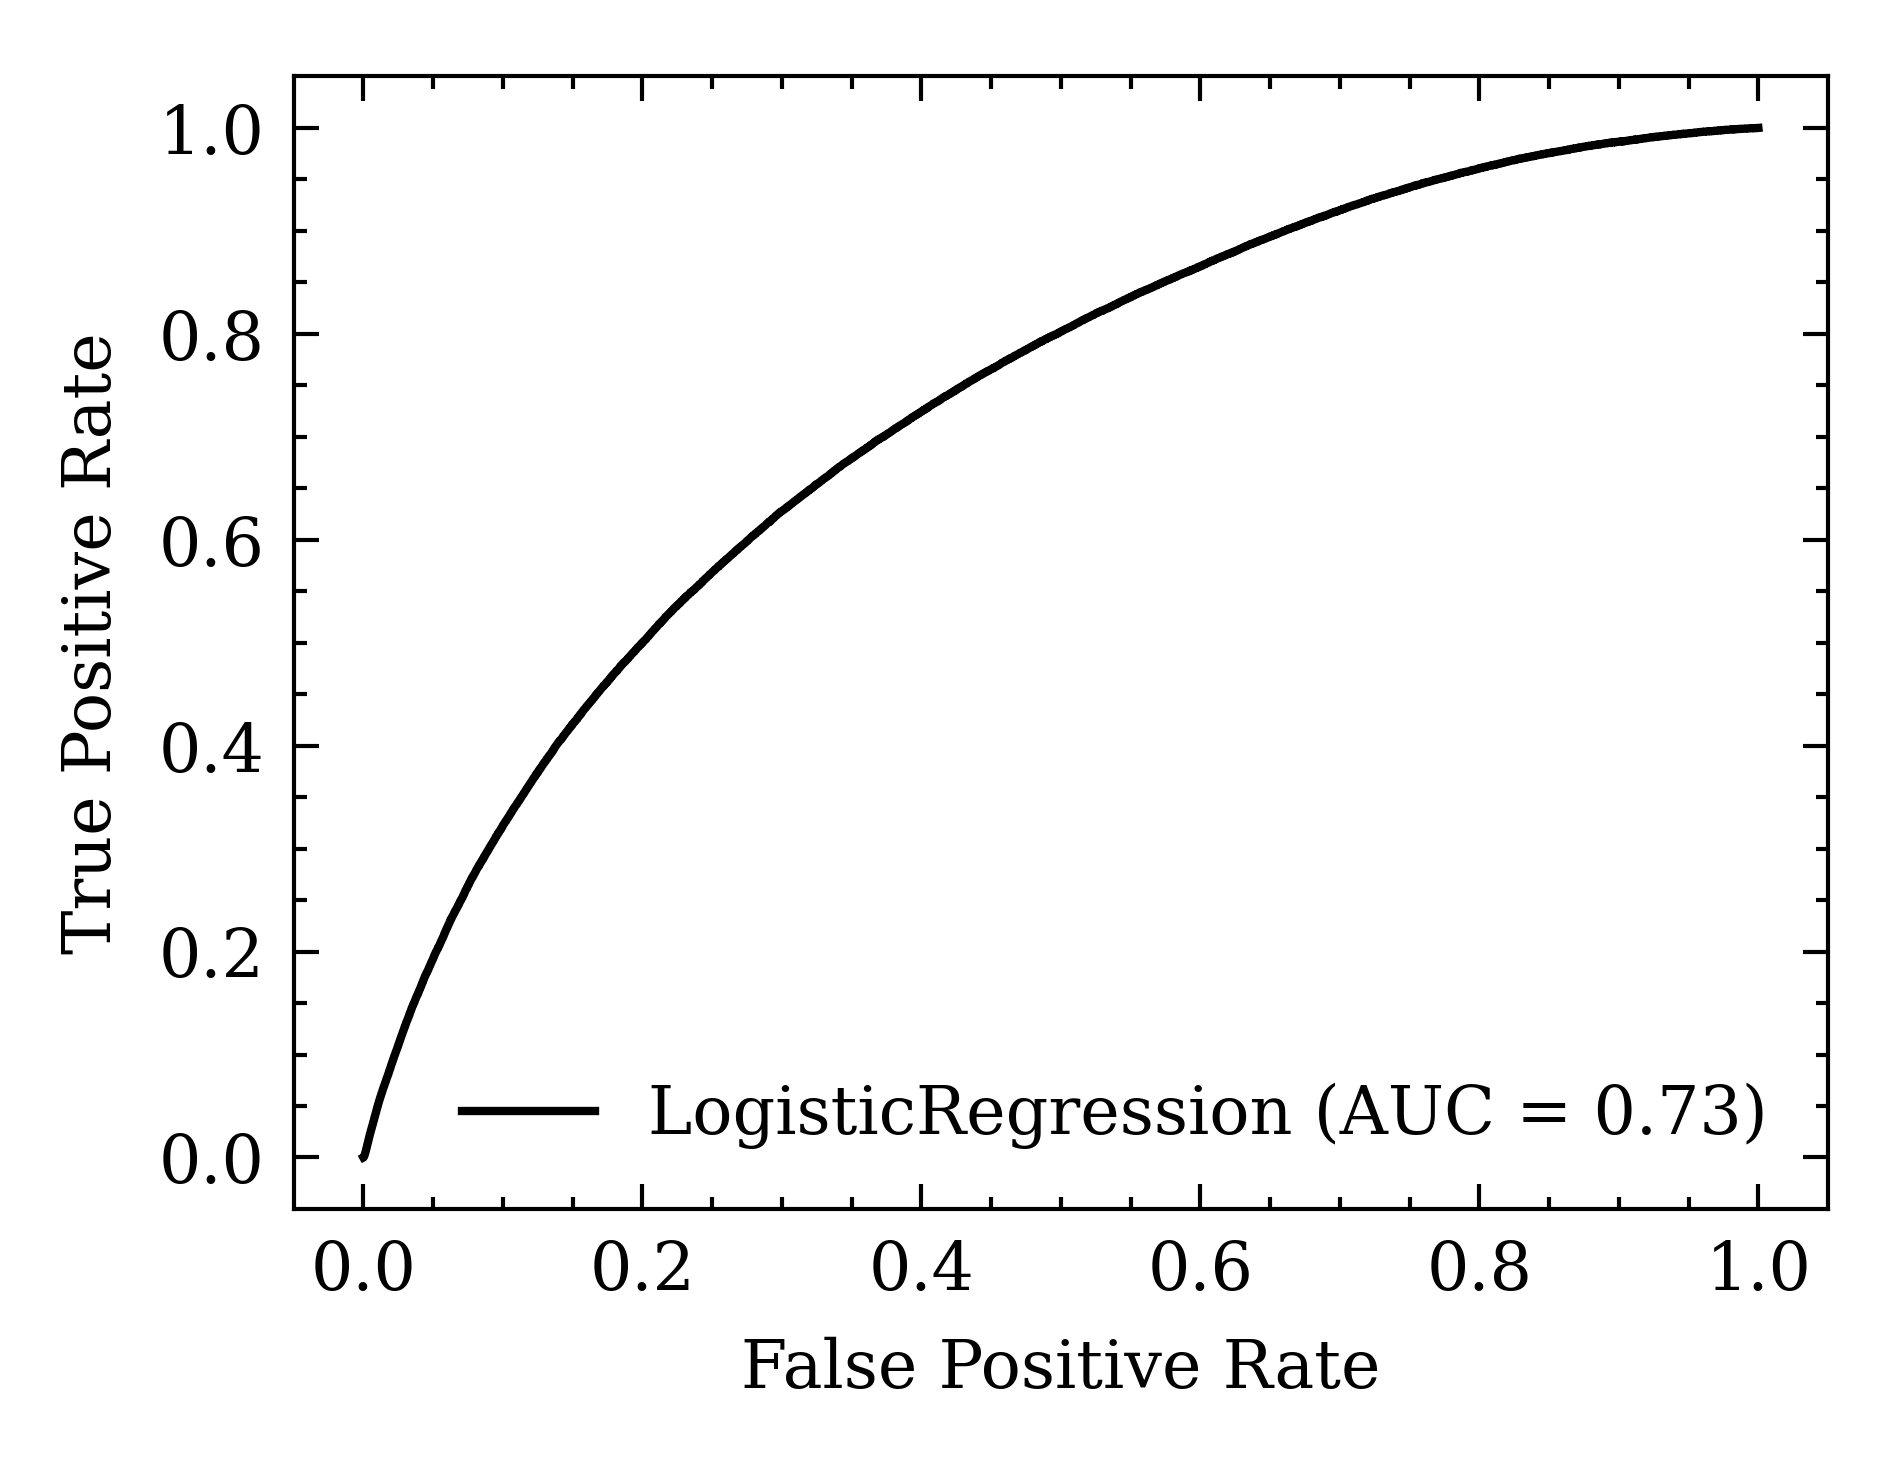

In [50]:
clf2 =LogisticRegression(random_state=0,class_weight='balanced',penalty='elasticnet',solver='saga',l1_ratio=0.1,max_iter=10000)   
clf2.fit(X_res,y_res)
with plt.style.context(['science','ieee','no-latex']):
    plot_roc_curve(clf2,X_test,y_test)

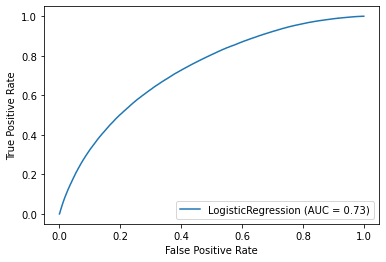

In [49]:
plot_roc_curve(clf1, X_test, y_test) 

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics

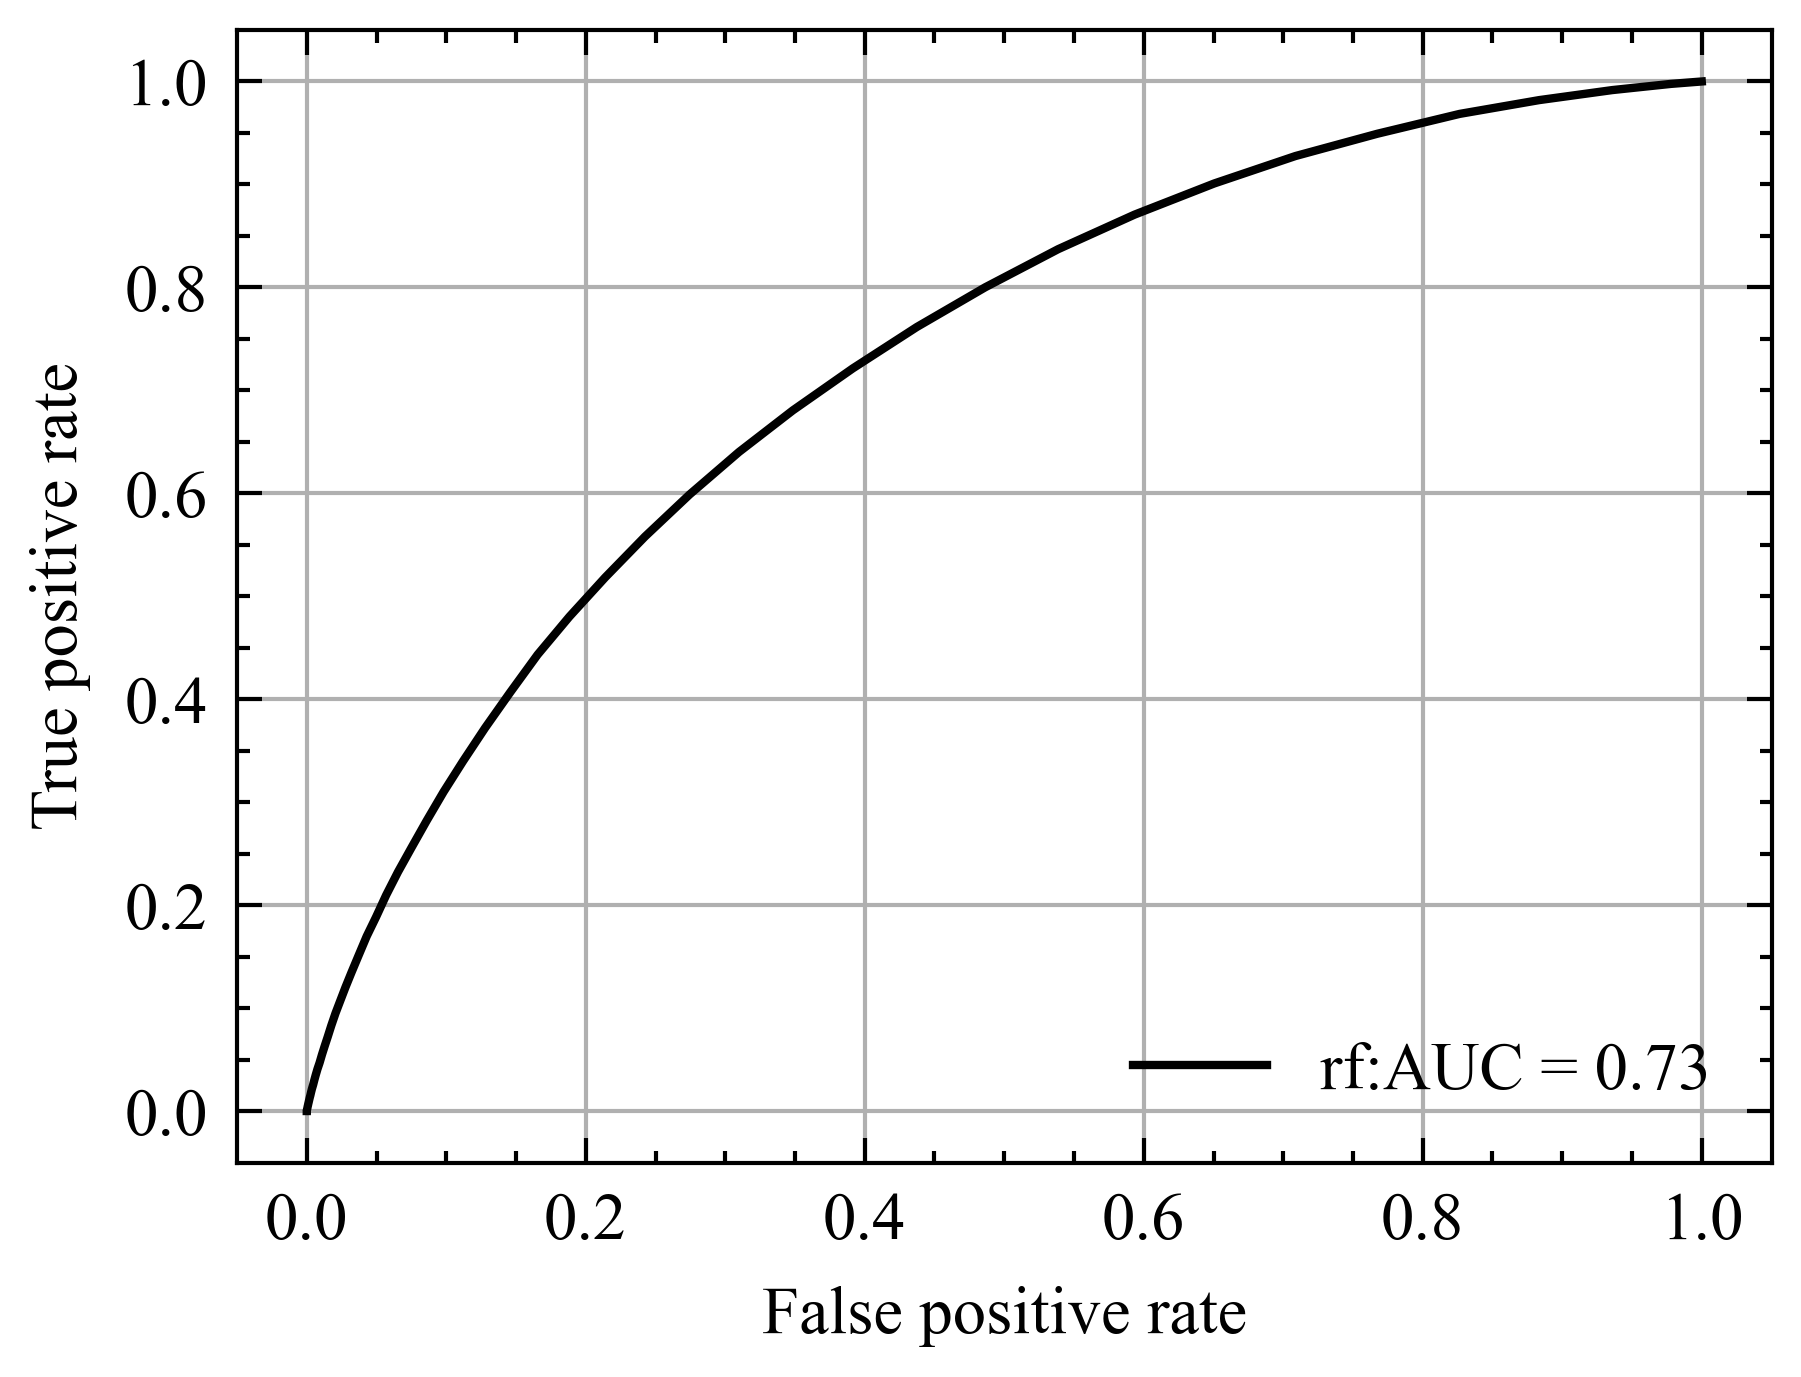

In [75]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
with plt.style.context(['science','ieee','no-latex']):
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'rf:AUC = %0.2f' % roc_auc)
    plt.grid()
    #plt.title('ROC Curve of RuleFit',fontsize=5)
    plt.legend(loc = 'lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

In [65]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    645909
           1       0.47      0.01      0.01     88809

    accuracy                           0.88    734718
   macro avg       0.67      0.50      0.47    734718
weighted avg       0.83      0.88      0.82    734718



In [ ]:
METRICS = [
     # tf.keras.metrics.TruePositives(name='tp'),
      #tf.keras.metrics.FalsePositives(name='fp'),
      #tf.keras.metrics.TrueNegatives(name='tn'),
      #tf.keras.metrics.FalseNegatives(name='fn'), 
      #tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      #tf.keras.metrics.Precision(name='precision'),
      #tf.keras.metrics.Recall(name='recall'),
      #tf.keras.metrics.AUC(name='auc'),
      #tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

### Number of Layers and neurons 
As a general rule of thumb
* The number of inital neurons in the ***first layer***= total number of features or less 
* The number of inital neurons in the ***second layer***= approx. half of the number of features
* The number of hiden layers is 2 
This is what we will start with but can be changed in future runs 

In [ ]:
df.shape

In [ ]:
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(120, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      
      tf.keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model = make_model()

# train model normally
model.fit(X_train,y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(X_test,y_test), callbacks = early_stopping)

In [ ]:
model.summary()

# Model Evaluation 

We note that the classes are imbalanced, there are very few Default loans. 

In [ ]:
neg  = df["loan_status"].value_counts()[0]
pos = df["loan_status"].value_counts()[1]

print("% of False:",neg/ len(df))
print("% of True:",pos / len(df))

We need to beat an accuracy of 87% \
i.e. a model that only notes False (not Paid) 

In [ ]:
history = pd.DataFrame(data = model.history.history)

## Plot the loss of the traing and test set 
history.plot()

In [ ]:
print( "best epoch: ", history["val_loss"].argmin() )

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

In [ ]:
print( accuracy_score(y_test,y_pred) )

print( classification_report(y_test,y_pred) )

### Poor performance 
87% accuracy as seen above is not ideal, as this is showing that the model may only be labelling most things FALSE
We can also see this via the F1 score for 1 (positive) of 0.0, which is very poor 

# New bias model 

In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

In [ ]:
with tpu_strategy.scope(): 
  model_bias = make_model(output_bias=initial_bias)

# train model normally
model_bias.fit(X_train,y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(X_test,y_test), callbacks = early_stopping)

In [ ]:
history_bias = pd.DataFrame(data = model_bias.history.history)

history_bias[["loss","val_loss"]].plot()

In [ ]:
model_bias.evaluate(X_test,y_test)

In [ ]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model_bias.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

In [ ]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model_bias.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

print( accuracy_score(y_test,y_pred) )

print( classification_report(y_test,y_pred) )

# New Weighted model 
*The goal is to identify fraudulent transactions, but you don't have very many of those positive samples to work with, so you would want to have the classifier heavily weight the few examples that are available. You can do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class.*


***Note***: Scaling by len(df)/2 helps keep the loss to a similar magnitude.\
***Note***: The sum of the weights of all examples stays the same.

In [ ]:
weight_for_0 = (1 / neg) * (len(df) / 2.0)
weight_for_1 = (1 / pos) * (len(df) / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

In [ ]:
with tpu_strategy.scope(): 
  model_weighted = make_model(output_bias=initial_bias)

## note the class weight 
model_weighted.fit(X_train,y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(X_test,y_test), callbacks = early_stopping
                  ,class_weight=class_weight)

In [ ]:
history_weighted = pd.DataFrame(data = model_weighted.history.history)

## Plot the loss of the traing and test set 
history_weighted.plot()

In [ ]:
model_weighted.evaluate(X_test,y_test)

In [ ]:
history_weighted["val_loss"].argmin()

In [ ]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model_weighted.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

print( accuracy_score(y_test,y_pred) )

print( classification_report(y_test,y_pred) )